In [1]:
import pandas as pd
import numpy as np

In [2]:
import os

In [3]:
print(os.listdir())

['load_data_from_kaggle_api.ipynb', 'pictures', 'kaggle.json', 'project_group_IOT.ipynb', 'README.md', '.ipynb_checkpoints', '.git', 'assets']


In [4]:
os.chdir("./assets")

In [5]:
test = pd.read_csv("test.csv")
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [6]:
train = pd.read_csv("train.csv")
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
test.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [8]:
train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [9]:
print(set(test.columns)-set(train.columns))
print(set(train.columns)-set(test.columns))
print(train["price_range"].describe())

{'id'}
{'price_range'}
count    2000.000000
mean        1.500000
std         1.118314
min         0.000000
25%         0.750000
50%         1.500000
75%         2.250000
max         3.000000
Name: price_range, dtype: float64


In [10]:
train_price_y = np.array(train["price_range"])
print((train_price_y))
data = train_price_y
shape = (data.size, data.max()+1)
one_hot_y = np.zeros(shape)
rows = np.arange(data.size)
one_hot_y[rows, data] = 1
print(one_hot_y)

[1 2 2 ... 3 0 3]
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]


In [11]:
test_x = test.drop(columns=["id"])
train_x = train.drop(columns=["price_range"])

train in the wrong way

In [12]:
# NN
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(len(train_x.columns), input_dim=len(train_x.columns), activation='relu'))
model.add(Dense(len(train_x.columns)/2, input_dim=len(train_x.columns), activation='sigmoid'))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_x, one_hot_y, epochs=500, batch_size=64)

Epoch 1/500
32/32 [==============================] - 0s 847us/step - loss: 1.4877 - accuracy: 0.2617
Epoch 2/500
32/32 [==============================] - 0s 781us/step - loss: 1.3756 - accuracy: 0.2343
Epoch 3/500
32/32 [==============================] - 0s 1ms/step - loss: 1.2669 - accuracy: 0.4659
Epoch 4/500
32/32 [==============================] - 0s 920us/step - loss: 1.2254 - accuracy: 0.4817
Epoch 5/500
32/32 [==============================] - 0s 897us/step - loss: 1.1893 - accuracy: 0.5278
Epoch 6/500
32/32 [==============================] - 0s 968us/step - loss: 1.1680 - accuracy: 0.5302
Epoch 7/500
32/32 [==============================] - 0s 872us/step - loss: 1.1403 - accuracy: 0.5304
Epoch 8/500
32/32 [==============================] - 0s 865us/step - loss: 1.1302 - accuracy: 0.5215
Epoch 9/500
32/32 [==============================] - 0s 850us/step - loss: 1.1243 - accuracy: 0.5010
Epoch 10/500
32/32 [==============================] - 0s 995us/step - loss: 1.1128 - accuracy

32/32 [==============================] - 0s 834us/step - loss: 0.8063 - accuracy: 0.6481
Epoch 82/500
32/32 [==============================] - 0s 877us/step - loss: 0.8355 - accuracy: 0.6117
Epoch 83/500
32/32 [==============================] - 0s 833us/step - loss: 0.7709 - accuracy: 0.6718
Epoch 84/500
32/32 [==============================] - 0s 792us/step - loss: 0.7984 - accuracy: 0.6378
Epoch 85/500
32/32 [==============================] - 0s 796us/step - loss: 0.8141 - accuracy: 0.6490
Epoch 86/500
32/32 [==============================] - 0s 804us/step - loss: 0.7545 - accuracy: 0.6790
Epoch 87/500
32/32 [==============================] - 0s 749us/step - loss: 0.7468 - accuracy: 0.6857
Epoch 88/500
32/32 [==============================] - 0s 783us/step - loss: 0.7652 - accuracy: 0.6687
Epoch 89/500
32/32 [==============================] - 0s 792us/step - loss: 0.8191 - accuracy: 0.6146
Epoch 90/500
32/32 [==============================] - 0s 857us/step - loss: 0.7865 - accuracy: 

32/32 [==============================] - 0s 826us/step - loss: 0.6711 - accuracy: 0.7001
Epoch 161/500
32/32 [==============================] - 0s 816us/step - loss: 0.6858 - accuracy: 0.7016
Epoch 162/500
32/32 [==============================] - 0s 795us/step - loss: 0.6935 - accuracy: 0.6896
Epoch 163/500
32/32 [==============================] - 0s 830us/step - loss: 0.7347 - accuracy: 0.6875
Epoch 164/500
32/32 [==============================] - 0s 782us/step - loss: 0.6745 - accuracy: 0.7171
Epoch 165/500
32/32 [==============================] - 0s 830us/step - loss: 0.7279 - accuracy: 0.6779
Epoch 166/500
32/32 [==============================] - 0s 899us/step - loss: 0.7082 - accuracy: 0.6849
Epoch 167/500
32/32 [==============================] - 0s 932us/step - loss: 0.7652 - accuracy: 0.6196
Epoch 168/500
32/32 [==============================] - 0s 901us/step - loss: 0.6984 - accuracy: 0.6809
Epoch 169/500
32/32 [==============================] - 0s 864us/step - loss: 0.6880 - a

32/32 [==============================] - 0s 903us/step - loss: 0.6778 - accuracy: 0.7066
Epoch 240/500
32/32 [==============================] - 0s 892us/step - loss: 0.6969 - accuracy: 0.6715
Epoch 241/500
32/32 [==============================] - 0s 870us/step - loss: 0.6494 - accuracy: 0.7112
Epoch 242/500
32/32 [==============================] - 0s 840us/step - loss: 0.6895 - accuracy: 0.7171
Epoch 243/500
32/32 [==============================] - 0s 792us/step - loss: 0.6632 - accuracy: 0.7061
Epoch 244/500
32/32 [==============================] - 0s 846us/step - loss: 0.6910 - accuracy: 0.6873
Epoch 245/500
32/32 [==============================] - 0s 875us/step - loss: 0.6777 - accuracy: 0.7014
Epoch 246/500
32/32 [==============================] - 0s 821us/step - loss: 0.6763 - accuracy: 0.6963
Epoch 247/500
32/32 [==============================] - 0s 839us/step - loss: 0.6780 - accuracy: 0.7174
Epoch 248/500
32/32 [==============================] - 0s 862us/step - loss: 0.6624 - a

32/32 [==============================] - 0s 945us/step - loss: 0.6880 - accuracy: 0.6919
Epoch 319/500
32/32 [==============================] - 0s 941us/step - loss: 0.6420 - accuracy: 0.7052
Epoch 320/500
32/32 [==============================] - 0s 836us/step - loss: 0.6509 - accuracy: 0.7264
Epoch 321/500
32/32 [==============================] - 0s 853us/step - loss: 0.6690 - accuracy: 0.7041
Epoch 322/500
32/32 [==============================] - 0s 814us/step - loss: 0.6534 - accuracy: 0.7012
Epoch 323/500
32/32 [==============================] - 0s 830us/step - loss: 0.6776 - accuracy: 0.6840
Epoch 324/500
32/32 [==============================] - 0s 836us/step - loss: 0.6644 - accuracy: 0.6945
Epoch 325/500
32/32 [==============================] - 0s 800us/step - loss: 0.6680 - accuracy: 0.6712
Epoch 326/500
32/32 [==============================] - 0s 833us/step - loss: 0.6580 - accuracy: 0.7149
Epoch 327/500
32/32 [==============================] - 0s 917us/step - loss: 0.6649 - a

32/32 [==============================] - 0s 1ms/step - loss: 0.6186 - accuracy: 0.7372
Epoch 398/500
32/32 [==============================] - 0s 1ms/step - loss: 0.6599 - accuracy: 0.7214
Epoch 399/500
32/32 [==============================] - 0s 1ms/step - loss: 0.6201 - accuracy: 0.7392
Epoch 400/500
32/32 [==============================] - 0s 1ms/step - loss: 0.6270 - accuracy: 0.7446
Epoch 401/500
32/32 [==============================] - 0s 1ms/step - loss: 0.6327 - accuracy: 0.7387
Epoch 402/500
32/32 [==============================] - 0s 1ms/step - loss: 0.6224 - accuracy: 0.7417
Epoch 403/500
32/32 [==============================] - 0s 1ms/step - loss: 0.6281 - accuracy: 0.7319
Epoch 404/500
32/32 [==============================] - 0s 1ms/step - loss: 0.6289 - accuracy: 0.7236
Epoch 405/500
32/32 [==============================] - 0s 1ms/step - loss: 0.6074 - accuracy: 0.7436
Epoch 406/500
32/32 [==============================] - 0s 1ms/step - loss: 0.5861 - accuracy: 0.7688
Epoc

32/32 [==============================] - 0s 900us/step - loss: 0.6322 - accuracy: 0.7422
Epoch 478/500
32/32 [==============================] - 0s 1ms/step - loss: 0.6139 - accuracy: 0.7560
Epoch 479/500
32/32 [==============================] - 0s 910us/step - loss: 0.6079 - accuracy: 0.7413
Epoch 480/500
32/32 [==============================] - 0s 938us/step - loss: 0.6537 - accuracy: 0.7281
Epoch 481/500
32/32 [==============================] - 0s 976us/step - loss: 0.6273 - accuracy: 0.7480
Epoch 482/500
32/32 [==============================] - 0s 991us/step - loss: 0.6186 - accuracy: 0.7404
Epoch 483/500
32/32 [==============================] - 0s 965us/step - loss: 0.6272 - accuracy: 0.7335
Epoch 484/500
32/32 [==============================] - 0s 948us/step - loss: 0.5978 - accuracy: 0.7542
Epoch 485/500
32/32 [==============================] - 0s 978us/step - loss: 0.6604 - accuracy: 0.7270
Epoch 486/500
32/32 [==============================] - 0s 931us/step - loss: 0.6296 - acc

In [13]:
nn_predict = model.predict(train_x)
# a = accuracy_score(pred,test)
# print('Accuracy is:', a*100)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=10)
model.fit(train_x,train_price_y)

#cheat
y_model = model.predict(train_x)
from sklearn.metrics import accuracy_score
accuracy_score(train_price_y, y_model)

0.944

#Train in the right way

In [15]:
from sklearn.model_selection import train_test_split
x1,x2,y1,y2 = train_test_split(train_x,train_price_y, random_state=64, train_size=0.7)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=50)
model.fit(x1,y1)

#predict
y_model = model.predict(x2)
from sklearn.metrics import accuracy_score
accuracy_score(y2, y_model)

0.92

In [17]:
X = train_x
y = train_price_y
from sklearn.model_selection import cross_val_score
print(cross_val_score(model, X,y,cv=5))

from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X,y,cv=LeaveOneOut().split(X))
print(scores.mean())

[0.93   0.9425 0.92   0.93   0.905 ]
0.928


Grid Search

In [18]:
from sklearn.model_selection import GridSearchCV
param_grid = {"n_neighbors":np.arange(1,100)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=7)
grid.fit(X,y)


GridSearchCV(cv=7, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [19]:
print(grid.best_params_)
model = grid.best_estimator_
import matplotlib.pyplot as plt

{'n_neighbors': 12}


In [20]:
y_test = model.fit(x1,y1).predict(x2)

In [21]:
accuracy_score(y2, y_test)

0.9266666666666666

Source code reference:2110446 Data Science and Data engineering (Computer engineering)

In [22]:
from sklearn.svm import SVC

In [23]:
import time
import datetime

import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None)

import matplotlib.pyplot as plt
plt.style.use('seaborn')

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_x,train_price_y, random_state=64, train_size=0.7)

Integrating with SVM with linear and scale parameter

In [24]:
C = 1 #@param {type:"slider", min:1.0, max:3.0, step:0.1}
kernel = "linear" #@param ['linear', 'poly', 'rbf']
gamma = "scale"  #@param ['scale', 'auto']

svm = SVC(
  C=C,
  kernel=kernel,
  gamma=gamma,
  cache_size=4096,
   random_state=0
)

svm_start_time = time.time()
model=svm.fit(X_train,y_train)
svm_end_time = time.time()
print(f"Training Time: {datetime.timedelta(seconds=svm_end_time-svm_start_time)}")

Training Time: 0:00:08.593241


In [25]:
#predict
y_model = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model)

0.9683333333333334

In [26]:
# Predict as Class
train_predict = svm.predict(X_train)
test_predict = svm.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, test_predict, labels=[1, 0])

array([[143,   1],
       [  2, 141]])

Compare the predictions of the model with the testing output data.

In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test, test_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       143
           1       0.97      0.94      0.96       152
           2       0.93      0.96      0.95       149
           3       0.97      0.99      0.98       156

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600



In [29]:
y_train = np.array(train["price_range"])

Plotting scatter plot to see the price range classification between RAM and internal memory

<ipython-input-30-03ce812a0f18>:43: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


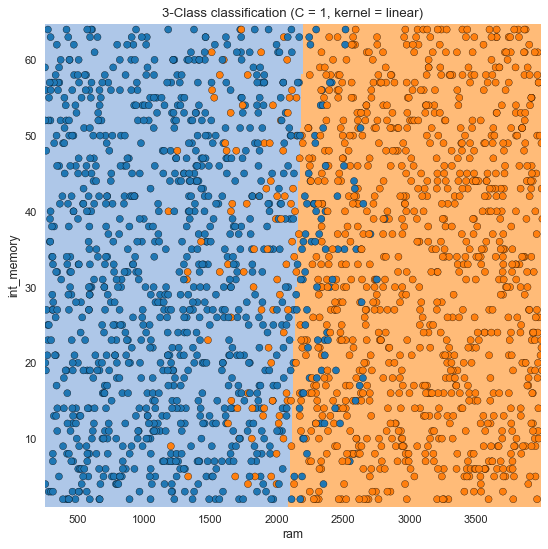

In [30]:
C = 1
kernel = "linear" #@param ['linear', 'poly', 'rbf']
gamma = "scale"


x_label = 'ram' 
y_label = 'int_memory'

x_idx = train.columns.to_list().index(x_label)
y_idx = train.columns.to_list().index(y_label)

# Script from https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html

from matplotlib import cm
from matplotlib.colors import ListedColormap
cmap_val = np.linspace(0.0, 1.0, 20)
cmap_light = ListedColormap(cm.get_cmap(plt.get_cmap('tab20'))(cmap_val)[1:5:2])
cmap_bold = ListedColormap(cm.get_cmap(plt.get_cmap('tab20'))(cmap_val)[:4:2])
h = 300  # step size in the mesh

model = SVC(
  C=C,
  kernel=kernel,
  gamma=gamma,
  cache_size=4096,
    random_state=0
)
model.fit(train.iloc[:, [x_idx, y_idx]], y_train)
x_min, x_max = train.iloc[:, x_idx].min() - 1, train.iloc[:, x_idx].max() + 1
y_min, y_max = train.iloc[:, y_idx].min() - 1, train.iloc[:, y_idx].max() + 1
xx, yy = np.meshgrid(
  np.arange(x_min, x_max, (x_max-x_min)/h),
  np.arange(y_min, y_max, (y_max-y_min)/h)
)
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 8), dpi=80)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(
  train.iloc[:, x_idx],
  train.iloc[:, y_idx],
  c=y_train,
  cmap=cmap_bold,
  edgecolor='k',
  s=40
)
plt.xlabel(x_label)
plt.xlim(xx.min(), xx.max())
plt.ylabel(y_label)
plt.ylim(yy.min(), yy.max())
plt.title(f"3-Class classification (C = {C}, kernel = {kernel})")
plt.show()

Reference:https://www.kaggle.com/sercanyesiloz/mobile-price-prediction

In [31]:
! pip install plotly

     |████████████████████████████████| 13.2 MB 11.0 MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=2d1a7afc0db0f4b4eb0102358ae10f5153299b868c95cb219902ce1f8008b5a4
  Stored in directory: /Users/pathorn/Library/Caches/pip/wheels/c4/a7/48/0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


To emphasize the price range classification we divide price range into four part and then classify between Ram and internal memory

In [33]:
import plotly.graph_objs as go
from plotly.offline import iplot
train_0 = train[train.price_range == 0]
train_1 = train[train.price_range == 1]
train_2 = train[train.price_range == 2]
train_3 = train[train.price_range == 3]

trace1 =go.Scatter(
                    y = train_0.int_memory,
                    x = train_0.ram,
                    mode = "markers",
                    name = "Price Range: 0",
                    marker = dict(color = 'rgba(240, 136, 200, 0.8)'),
                    text= train_0.price_range)

trace2 =go.Scatter(
                    y = train_1.int_memory,
                    x = train_1.ram,
                    mode = "markers",
                    name = "Price Range: 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text= train_1.price_range)

trace3 =go.Scatter(
                    y = train_2.int_memory,
                    x = train_2.ram,
                    mode = "markers",
                    name = "Price Range: 2",
                    marker = dict(color = 'rgba(0, 240, 170, 0.8)'),
                    text= train_2.price_range)

trace4 =go.Scatter(
                    y = train_3.int_memory,
                    x = train_3.ram,
                    mode = "markers",
                    name = "Price Range: 3",
                    marker = dict(color = 'rgba(50, 70, 190, 0.8)'),
                    text= train_3.price_range) 


data = [trace1, trace2, trace3, trace4]

layout = dict(title = 'Ram - Internal_memory - Price Range',
              xaxis= dict(title= 'Ram',
                          ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Internal_memory',
                          ticklen= 5,zeroline= False),
             autosize=False,
             width=700,
             height=450,)
fig = dict(data = data, layout = layout)
    
iplot(fig)